<h1>Spotify Popular Songs Analysis</h1>

<img src="http://storage.googleapis.com/kaggle-datasets-images/2570056/4372070/fe6dd42ee550bd3dcd153e2f97dda840/dataset-cover.jpg" width="400"  style="float: left; margin-right: 15px; margin-bottom: 10px;" alt="(CSCA-5632)">


CSCA-5632: Unsupervised Learning Final Project<br/>
@author: Alexander Meau<br/>
@email: alme9155@colorado.edu
<hr/>

<h2>I. Project Description</h2>
<p>This is final project of CSCA-5632: Unsupervised Algorithms in Machine Learing.</p>
<p>Use techique of unsupervised learning to understand what features, such as danceability, energy, tempo, etc. will characterize a "hit" song.</p>

<h3>Objective:</h3>
<p>Use unsupervised learning to understand what features, such as danceability, energy, tempo, etc., characterize a "hit" song. While the definition of a popular "hit" song varies, this study will focus on characteristics that have reached the top 1% and 10% of popularity using the "Spotify Tracks" dataset.</p>

<h3>Type of Machine Learning Study:</h3>
Unsupervised learning (PCA + clustering to discover feature grouping
Target groups:
<ul>
    <li>Top 1% = Viral hits</li>
    <li>Top 10% = Popular songs</li>
</ul>
<h3>Dataset:</h3>
<p>Spotify Tracks Dataset from <a href="https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset">Kaggle</a>.</p>

<h3>Project Significance:</h3>
<p>Studying the Spotify Tracks dataset with unsupervised learning helps us gain deeper insights into what makes music resonate with listeners, independent of human bias or genre labels. Applying unsupervised learning methods (like clustering and dimensionality reduction) allows us to uncover hidden structures and natural groupings within the music landscape without relying on predefined labels.</p>
<ul>
<li>Identify Patterns:</li>
<p>Discover how musical attributes cluster together and what combinations tend to be associated with higher popularity.</p>
<li>Understand Hit Songs:</li>
<p>Reveal common characteristics shared by top-performing tracks versus less popular ones.</p>
<li>Support Future Prediction:</li>
<p>Provide a foundation for building supervised models to predict a song's potential popularity based on its features.</p>
</ul>


<h2>II. Dataset Description:</h2>
<p>Spotify Tracks Dataset from Kaggle (<a href="https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset">https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset</a>). The Spotify dataset contains over one million songs spanning 125 genres. Each entry includes the song's musical features and its popularity score.</p>
<h3>Number of features:</h3>

<style>
  table.dataframe { /* Basic styling similar to pandas output */
    border-collapse: collapse;
    border: 1px solid #ccc;
    margin-bottom: 1em; /* Add some space below the table */
  }
  table.dataframe th, table.dataframe td {
    border: 1px solid #ccc;
    padding: 8px 12px;
    text-align: left;
    vertical-align: top; /* Align text to the top of the cell */
  }
  table.dataframe th {
    background-color: #f2f2f2; /* Light grey header */
    font-weight: bold;
  }
  table.dataframe td code { /* Style the column names */
    background-color: #e8e8e8;
    padding: 2px 4px;
    border-radius: 3px;
    font-family: monospace;
  }
</style>

<table class="dataframe">
  <thead>
    <tr>
      <th>Column</th>
      <th>Column Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>track_id</code></td>
      <td>The Spotify ID for the track</td>
    </tr>
    <tr>
      <td><code>artists</code></td>
      <td>The artists' names who performed the track. If there is more than one artist, they are separated by a ;</td>
    </tr>
    <tr>
      <td><code>album_name</code></td>
      <td>The album name in which the track appears</td>
    </tr>
    <tr>
      <td><code>track_name</code></td>
      <td>Name of the track</td>
    </tr>
    <tr>
      <td><code>popularity</code></td>
      <td>The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.</td>
    </tr>
    <tr>
      <td><code>duration_ms</code></td>
      <td>The track length in milliseconds</td>
    </tr>
    <tr>
      <td><code>explicit</code></td>
      <td>Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)</td>
    </tr>
    <tr>
      <td><code>danceability</code></td>
      <td>Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable</td>
    </tr>
    <tr>
      <td><code>energy</code></td>
      <td>Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale</td>
    </tr>
    <tr>
      <td><code>key</code></td>
      <td>The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1</td>
    </tr>
    <tr>
      <td><code>loudness</code></td>
      <td>The overall loudness of a track in decibels (dB)</td>
    </tr>
    <tr>
      <td><code>mode</code></td>
      <td>Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0</td>
    </tr>
    <tr>
      <td><code>speechiness</code></td>
      <td>Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks</td>
    </tr>
    <tr>
      <td><code>acousticness</code></td>
      <td>A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic</td>
    </tr>
    <tr>
      <td><code>instrumentalness</code></td>
      <td>Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content</td>
    </tr>
    <tr>
      <td><code>liveness</code></td>
      <td>Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live</td>
    </tr>
    <tr>
      <td><code>valence</code></td>
      <td>A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)</td>
    </tr>
    <tr>
      <td><code>tempo</code></td>
      <td>The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration</td>
    </tr>
    <tr>
      <td><code>time_signature</code></td>
      <td>An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.</td>
    </tr>
    <tr>
      <td><code>track_genre</code></td>
      <td>The genre in which the track belongs</td>
    </tr>
  </tbody>
</table>


<h2>III. Exploratory Data Analysis</h2>

<h3>III.i.Loading the data from Kaggle</h3>
This notebook require internet connection to access dataset from the kaggle dataset.

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## loading the data
data = pd.read_csv('/kaggle/input/-spotify-tracks-dataset/dataset.csv')
print(f"Data loaded successfully.")

/kaggle/input/-spotify-tracks-dataset/dataset.csv
Data loaded successfully.


<h3>III.ii.Exploring and understanding the data</h3>
Perform a thorough exploratory data analysis (EDA) using appropriate visualizations, and then summarize the key findings to formulate project strategy.

In [10]:
# EDA process
# 1. load the dataset
# 2. inspect the data

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

# drop row-id column "Unnamed: 0"
data = data.drop("Unnamed: 0", axis=1)

print(f"\nDataSet Info:")
print("--------------------------")
print(data.info())
print(f"\nDataSet Shape:")
print("--------------------------")
print(f"Data Shape: {data.shape[0]} Rows x {data.shape[1]} Columns")
# print(data.shape)

print(f"\nFirst five rows of training data:")
print("--------------------------") 
df_head = data.head(5)
display(df_head)

print(f"\nNull values in non-numeric columns:")
print("--------------------------")    
print(data.select_dtypes(include='object').columns.isnull().sum())

numeric_columns = data.select_dtypes(exclude='object').columns
zero_counts = (data[numeric_columns] == 0).sum().sort_values(ascending=False)
print("\nNumber of zeros in each numeric column:")
print("----------------------------------------")
df_zeros = pd.DataFrame({
    'Column Name': zero_counts.index,
    'Number of Zeros': zero_counts.values
})
df_zeros['% of Zeros Rows'] = ((df_zeros['Number of Zeros'] / data.shape[0]) * 100).round(2).astype(str)+"%"
display(df_zeros)


DataSet Info:
--------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 n

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic



Null values in non-numeric columns:
--------------------------
0

Number of zeros in each numeric column:
----------------------------------------


,Column Name,Number of Zeros,% of Zeros Rows
0,explicit,104253,91.45%
1,mode,41319,36.24%
2,instrumentalness,38763,34.0%
3,popularity,16020,14.05%
4,key,13061,11.46%
5,valence,176,0.15%
6,time_signature,163,0.14%
7,danceability,157,0.14%
8,speechiness,157,0.14%
9,tempo,157,0.14%



Popularity
--------------------------
Number of popularity:101
Popularity ranges: range(0,100)


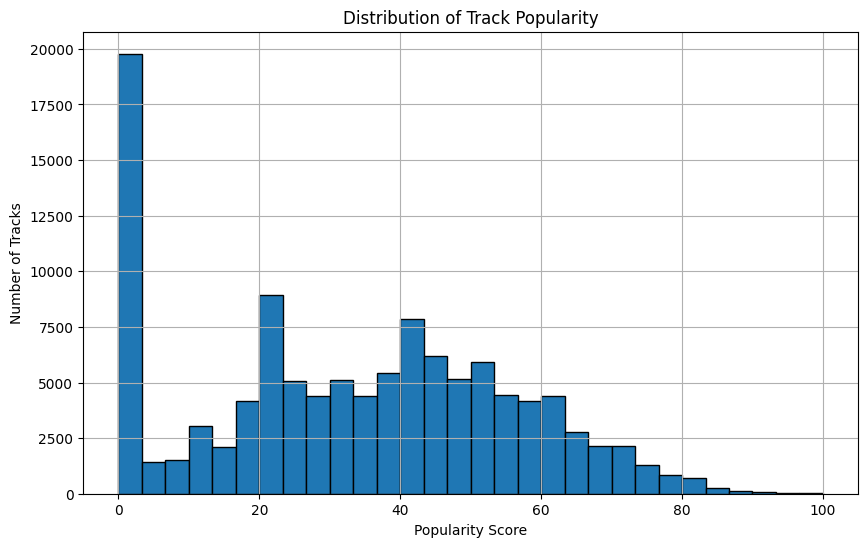

In [11]:
import matplotlib.pyplot as plt

print("\nPopularity")
print("--------------------------")    
unique_popularity_values = data['popularity'].unique()
print(f"Number of popularity:{len(unique_popularity_values)}")
print(f"Popularity ranges: range({data['popularity'].min()},{data['popularity'].max()})")

# Basic histogram
plt.figure(figsize=(10,6))
plt.hist(data['popularity'], bins=30, edgecolor='black')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.show()

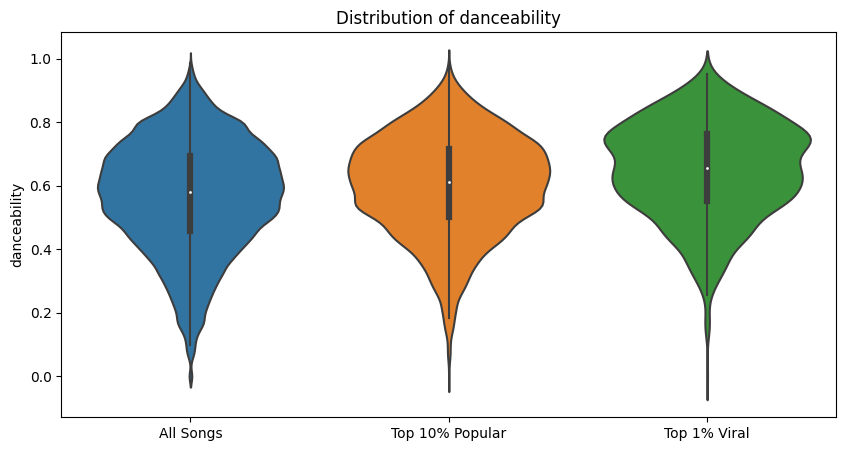

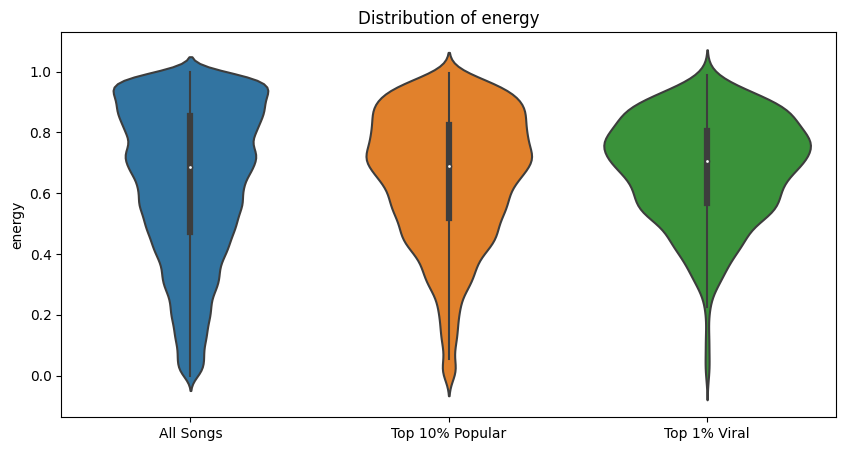

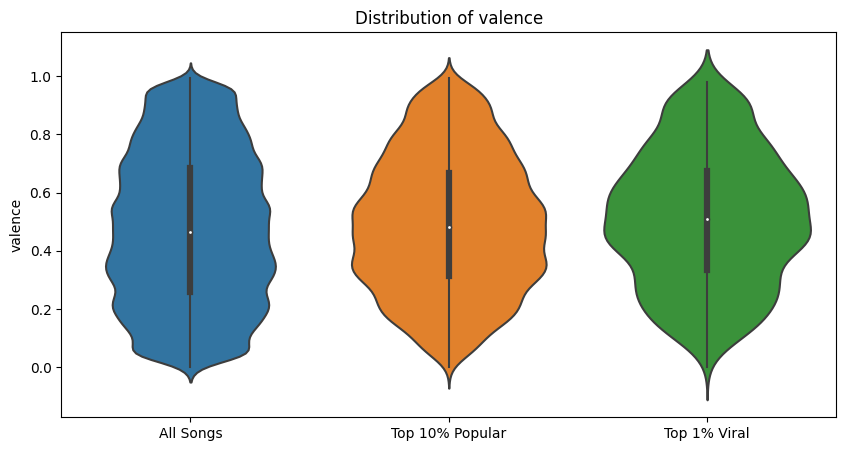

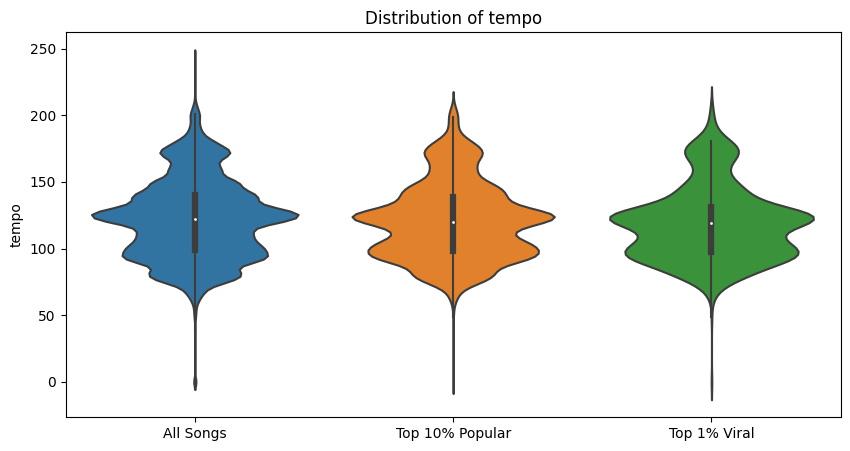

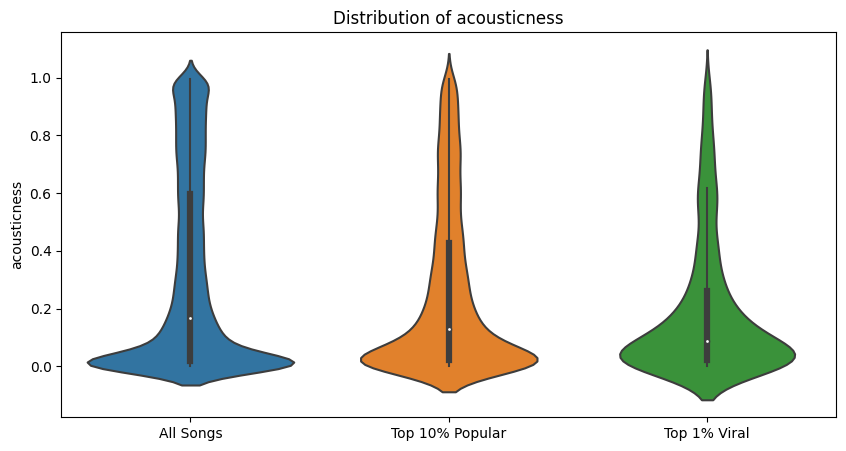

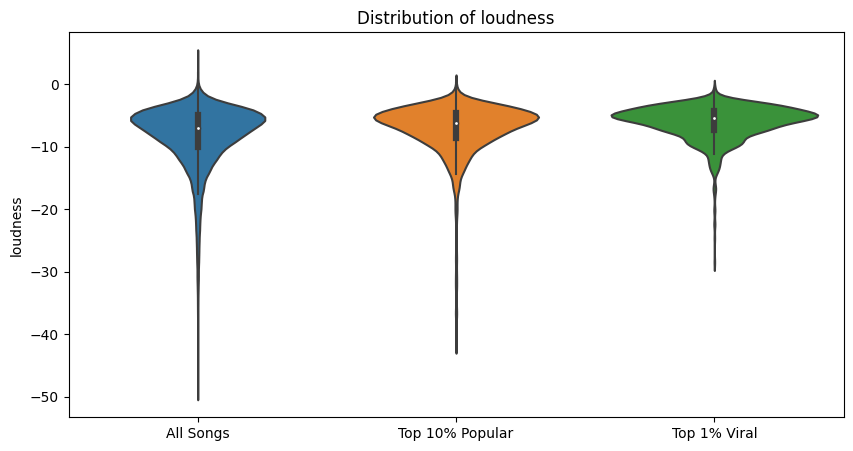

In [15]:
from math import pi
import matplotlib.pyplot as plt
import seaborn as sns
categories = features
viral_means = data[data['hit_label'] == 1][features].mean()
popular_means = data[data['hit_label'] == 2][features].mean()
non_hit_means = data[data['hit_label'] == 0][features].mean()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

ax.plot(angles, list(viral_means) + [viral_means[0]], label='Top 1% Viral')
ax.plot(angles, list(popular_means) + [popular_means[0]], label='Top 10% Popular')
ax.plot(angles, list(non_hit_means) + [non_hit_means[0]], label='All Songs')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.legend()
plt.title('Feature Profiles by Category')
plt.show()

# Plot
plt.figure(figsize=(8, 6))
correlation_matrix = data[data['hit_label'] == 1][features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features for Top 1% Viral Songs')
plt.show()

<h3>III.iii. Visualation</h3>

<h3>EDA summary and findings</h3>
<p>The dataset typically includes features like:</p>

<ul>
  <li><strong>Track metadata:</strong> <code>track_name</code>, <code>artists</code>, <code>album_name</code>, <code>track_id</code>.</li>
  
  <li><strong>Audio features:</strong> 
    <code>danceability</code>, <code>energy</code>, <code>key</code>, <code>loudness</code>, <code>mode</code>, 
    <code>speechiness</code>, <code>acousticness</code>, <code>instrumentalness</code>, <code>liveness</code>, 
    <code>valence</code>, <code>tempo</code>, <code>duration_ms</code>.
  </li>
  
  <li><strong>Popularity:</strong> 
    <code>popularity</code> (a score from 0 to 100, where higher values indicate more popular tracks).
  </li>
  
  <li><strong>Genre:</strong> <code>track_genre</code>.</li>
</ul>

<h2>IV. Data Cleaning and Pre-processing</h2>

In [ ]:
x_train, x_validate, y_train, y_validate = \
    train_test_split(x_train_tfidf, y_train, test_size=0.2, random_state=42)
train = 
test = pd.read_csv('/kaggle/input/learn-ai-bbc/BBC News Test.csv')